In [1]:
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) #자주쓰는 단어 10000개

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0] # 0이 나오면 부정 1은 긍정 즉 이진분류로 분류하기

1

In [6]:
word_index = imdb.get_word_index() #각각의 단어가 원래 뭐였는지
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items()) # word_index.items()는 (key, value)로 들어가고, 이 값은 [value, key]로 바뀌어서 들어간다.

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #첫번째만 뒤집어서 사용, i-3을 쓰는 이유는 안에있는 [0][1][2]값은 필요없는 값이기 때문이다, ?는 없는 문자를 ?로 치환하라는 의미

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
#enumerate 반복 가능한 객체들을 만들 때, 인덱스를 만들 때 사용
#ex i는 인덱스, c는 객체
for i, c in enumerate(['A','B','C']):
  print(i,c)

0 A
1 B
2 C


In [10]:
temp = enumerate(['A','B','C'])
list(temp) #list로 변환

[(0, 'A'), (1, 'B'), (2, 'C')]

In [11]:
temp = enumerate(['A','B','C'])
next(temp) #튜플로 변환

(0, 'A')

In [12]:
# 데이터 준비
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): #함수를 호출할 때 따로 dimension값을 주지 않으면 10000개의 배열을 만든다. 즉 10000개가 디폴트 값
  results = np.zeros((len(sequences),(dimension)))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

#data의 인코딩
x_train = vectorize_sequences(train_data) #10000개짜리 배열 train_data 개수만큼 0으로 초기화된 배열 생성, for문에 걸리는 값은 1로 변경
x_test = vectorize_sequences(test_data)

In [13]:
print(x_train) # int형

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [14]:
#float 타입으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
#신경망 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
#모델 컴파일
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
#쪼개놓는 이유 : 학습을 하면서 검증하기 위해서
x_val = x_train[:10000] #10000개 까지
partial_x_train = x_train[10000:] #나머지 부분

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 141ms/step - loss: 0.5014 - accuracy: 0.7820 - val_loss: 0.3650 - val_accuracy: 0.8763
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2936 - accuracy: 0.9023 - val_loss: 0.3019 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2154 - accuracy: 0.9297 - val_loss: 0.2771 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1679 - accuracy: 0.9447 - val_loss: 0.2811 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1358 - accuracy: 0.9569 - val_loss: 0.3004 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1092 - accuracy: 0.9665 - val_loss: 0.2973 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0906 - accuracy: 0.9727 - val_loss: 0.3186 - val_accuracy: 0.8826
Epoch 8/20
3

In [19]:
# 실험 결과 데이터
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

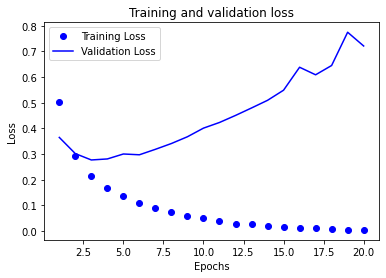

In [20]:
# 실험 결과를 시각화
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

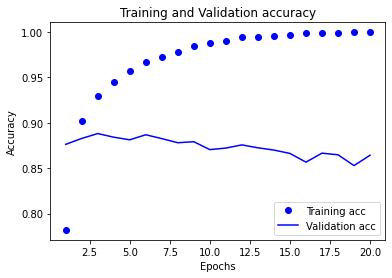

In [21]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
#새로 돌릴 때는 초기화 해야한다.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 67ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.7426 - val_accuracy: 0.8640
Epoch 2/3
30/30 [==============================] - 1s 48ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.7839 - val_accuracy: 0.8618
Epoch 3/3
 1/30 [>.............................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

KeyboardInterrupt: ignored